# 1.Try to fit the peaks at 3GeV for di-muon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Find the data of J/psi to:  two muons from 2010: https://opendata.cern.ch/record/301/files/dimuon-Jpsi.csv

In [4]:
file_path = 'https://opendata.cern.ch/record/301/files/dimuon-Jpsi.csv'

data_muons = pd.read_csv(file_path)

data_muons.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GT,140124,1007912007,13.70610,4.88649,-2.50860,12.55690,5.492801,1.564708,-0.474290,1,3.67389,-0.683250,0.529614,3.56917,0.864478,2.125464,2.482195,1,4.52006
1,GT,140124,1007957044,9.09052,-2.16135,-2.96392,-8.31686,3.668277,-1.557137,-2.200865,-1,3.80945,0.787428,-0.775826,-3.64400,1.105418,-1.908256,-0.777977,1,2.73378
2,GG,140124,1008000431,6.81754,5.76035,3.23987,-1.67015,6.608963,-0.250095,0.512346,1,19.14860,12.887500,12.388700,-6.86217,17.876452,-0.375014,0.765667,-1,3.07324
3,GT,140124,1008032300,31.88530,-5.85709,2.78331,-31.21880,6.484776,-2.275327,2.697978,1,4.26886,-1.501790,-0.486974,-3.96478,1.578771,-1.651423,-2.828028,1,3.13334
4,GT,140124,1008075983,13.55270,1.18694,-2.35966,-13.29240,2.641367,-2.318772,-1.104741,1,4.36207,1.190820,0.142888,-4.19262,1.199362,-1.964541,0.119420,1,2.15538


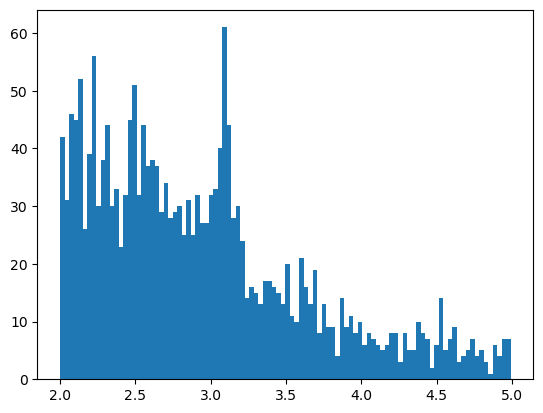

In [5]:
mass_muons = data_muons['M']
plt.hist(mass_muons, bins=100)
plt.show()

In [8]:
from scipy.optimize import curve_fit

In [10]:
# 定义高斯函数
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))

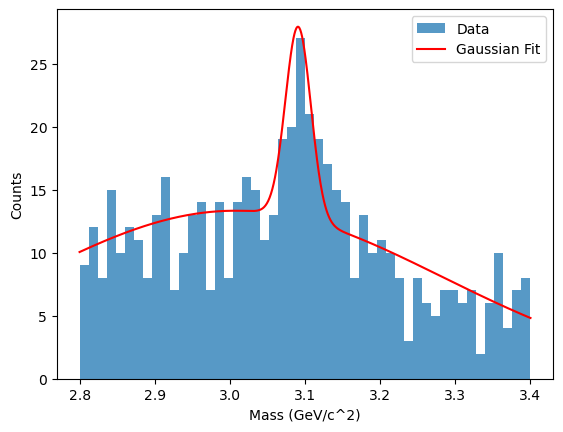

In [32]:
# 定义多重高斯函数
def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp = params[i]
        cen = params[i+1]
        wid = params[i+2]
        y += gaussian(x, amp, cen, wid)
    return y

# 选择适当的拟合范围
mask = (mass_muons > 2.8) & (mass_muons < 3.4)
fit_data = mass_muons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=47)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 进行多重高斯拟合
initial_guess = [20, 3.1, 0.1, 10, 3.0, 0.1]  # 初始猜测参数
popt, pcov = curve_fit(multi_gaussian, bin_centers, n, p0=initial_guess)

# 获取拟合参数
fitted_params = popt

# 验证拟合效果
plt.hist(fit_data, bins=50, alpha=0.75, label = 'Data')
x_fit = np.linspace(2.8, 3.4, 1000)
y_fit = multi_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label = 'Gaussian Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.legend() 
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

def neural_network(X, Y):
    """
    Define the NN model using Keras Sequential API.

    Parameters:
    X (np.ndarray): Input data.
    Y (np.ndarray): Target data.

    Returns:
    model (Sequential): A compiled Keras Sequential model.
    history (History): Training history.
    """
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.reshape(-1, 1))

    # Define the model
    model = Sequential()
    model.add(layers.Dense(256, input_dim=1, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    # Define the optimizer with an appropriate learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    # Fit the model and record history
    history = model.fit(X_scaled, Y, epochs=1000, batch_size=32, verbose=1)

    return model, history, scaler

In [7]:
# 读取数据
file_path = 'https://opendata.cern.ch/record/301/files/dimuon-Jpsi.csv'
data_muons = pd.read_csv(file_path)
mass_muons = data_muons['M']

# 选择适当的拟合范围
mask = (mass_muons > 2.8) & (mass_muons < 3.4)
fit_data = mass_muons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=47)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 准备数据
x_data = bin_centers
y_data = n

# 调用神经网络函数
model, history, scaler = neural_network(x_data, y_data)

D:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 176.5809
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.9334 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.7222 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162.3416 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.9340 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145.9320 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134.7477 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.6784 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.9845 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.0243  
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.5772 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.2177 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.2991 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.1778 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


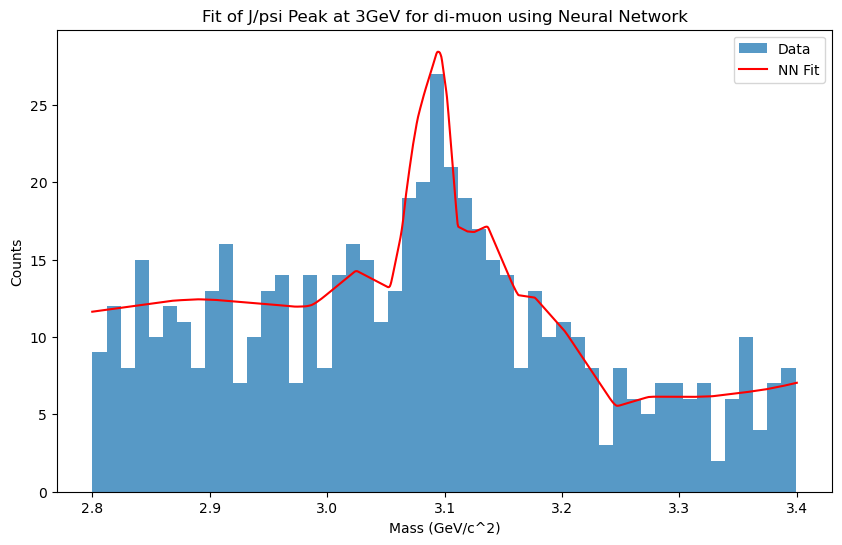

In [9]:
# 预测
x_fit = np.linspace(2.8, 3.4, 1000)
x_fit_scaled = scaler.transform(x_fit.reshape(-1, 1))
y_pred = model.predict(x_fit_scaled)

# 绘图
plt.figure(figsize=(10, 6))
plt.hist(fit_data, bins=50, alpha=0.75, label='Data')
plt.plot(x_fit, y_pred, color='red', label='NN Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of J/psi Peak at 3GeV for di-muon using Neural Network')
plt.legend()
plt.show()

# 2.Try to fit the peaks at 3GeV for electrons

Find the data of J/psi to two electrons from 2010: https://opendata.cern.ch/record/302/files/dielectron-Jpsi.csv

In [36]:
file_path = 'https://opendata.cern.ch/record/302/files/dielectron-Jpsi.csv'

data_electrons = pd.read_csv(file_path)

data_electrons.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147390,543767492,24.5210,3.89773,-16.16270,-18.02370,16.6260,-0.939585,-1.334160,-1,9.36334,4.20606,-5.503590,-6.30014,6.92679,-0.815936,-0.918244,-1,4.62593
1,147390,551904480,42.8325,-16.47240,4.63309,-39.26600,17.1116,-1.568160,2.867410,1,10.48800,-3.39472,-0.164604,-9.92201,3.39871,-1.792630,-3.093140,-1,2.99060
2,147390,286521299,78.6993,20.73460,-22.76030,72.42670,30.7889,1.590960,-0.831937,-1,19.11860,5.52052,-3.864810,17.89160,6.73891,1.703290,-0.610780,-1,3.56757
3,147390,348830108,35.7096,-12.67830,10.21260,-31.78270,16.2799,-1.422080,2.463500,1,15.74180,-4.55461,2.897110,-14.78730,5.39793,-1.732660,2.575060,-1,3.10446
4,147390,348839604,12.8308,-9.97245,-5.51779,-5.89352,11.3972,-0.496456,-2.636220,-1,20.47440,-18.03860,-2.928180,-9.23231,18.27470,-0.485855,-2.980670,1,4.94889


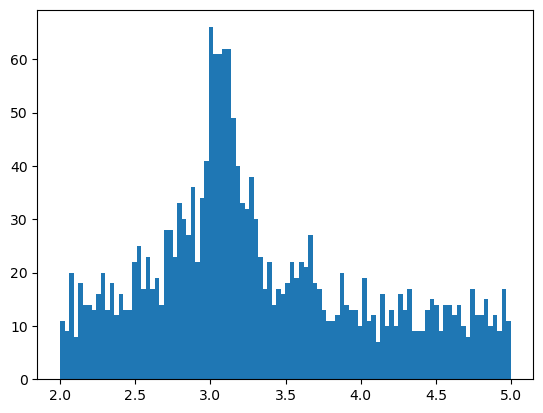

In [37]:
mass_electrons = data_electrons['M']
plt.hist(mass_electrons, bins=100)
plt.show()

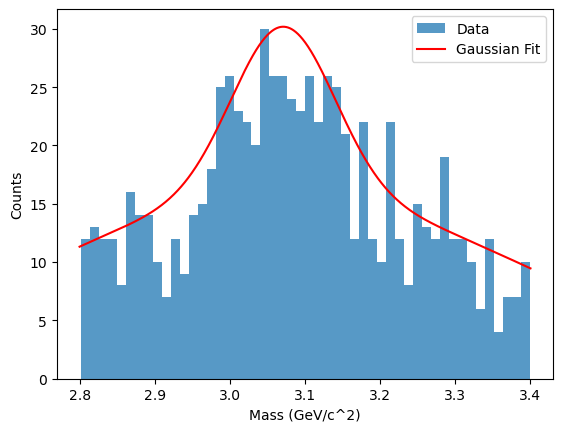

In [40]:
from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))

# 选择适当的拟合范围
mask = (mass_electrons > 2.8) & (mass_electrons < 3.4)
fit_data = mass_electrons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=44)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 进行多重高斯拟合
initial_guess = [20, 3.1, 0.1, 10, 3.0, 0.1]  # 初始猜测参数
popt, pcov = curve_fit(multi_gaussian, bin_centers, n, p0=initial_guess)

# 获取拟合参数
fitted_params = popt

# 验证拟合效果
plt.hist(fit_data, bins=50, alpha=0.75, label='Data')
x_fit = np.linspace(2.8, 3.4, 1000)
y_fit = multi_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Gaussian Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

def neural_network(X, Y):
    """
    Define the NN model using Keras Sequential API.

    Parameters:
    X (np.ndarray): Input data.
    Y (np.ndarray): Target data.

    Returns:
    model (Sequential): A compiled Keras Sequential model.
    history (History): Training history.
    """
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.reshape(-1, 1))

    # Define the model
    model = Sequential()
    model.add(layers.Dense(256, input_dim=1, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    # Define the optimizer with an appropriate learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    # Fit the model and record history
    history = model.fit(X_scaled, Y, epochs=1000, batch_size=32, verbose=1)

    return model, history, scaler

In [13]:
# 读取数据
file_path = 'https://opendata.cern.ch/record/302/files/dielectron-Jpsi.csv'
data_muons = pd.read_csv(file_path)
mass_muons = data_muons['M']

# 选择适当的拟合范围
mask = (mass_muons > 2.8) & (mass_muons < 3.4)
fit_data = mass_muons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=47)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 准备数据
x_data = bin_centers
y_data = n

# 调用神经网络函数
model, history, scaler = neural_network(x_data, y_data)

Epoch 1/1000


D:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 328.6190
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 325.4869 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 338.3652 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 330.8990 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 325.0849 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 317.8745 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 296.0584 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 294.6786 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269.0212 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 216.0459 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210.1399 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164.5054 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 148.3906 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.6002 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


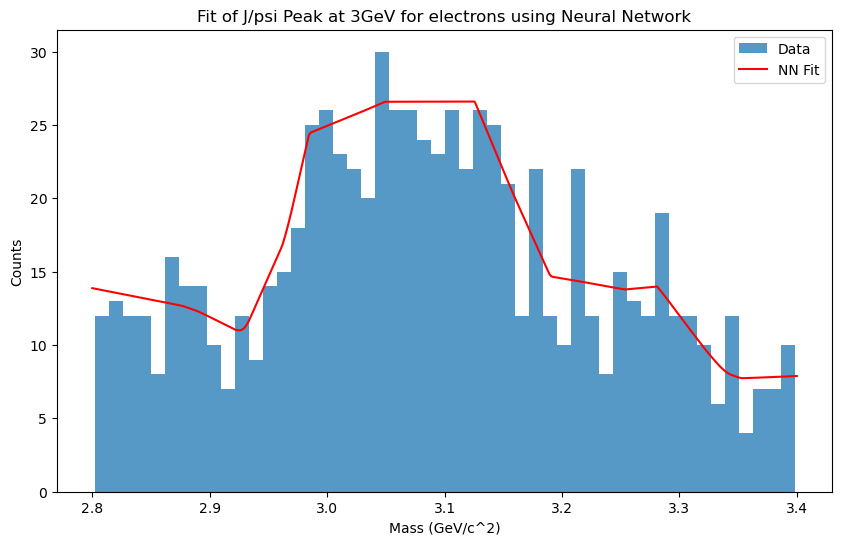

In [15]:
# 预测
x_fit = np.linspace(2.8, 3.4, 1000)
x_fit_scaled = scaler.transform(x_fit.reshape(-1, 1))
y_pred = model.predict(x_fit_scaled)

# 绘图
plt.figure(figsize=(10, 6))
plt.hist(fit_data, bins=50, alpha=0.75, label='Data')
plt.plot(x_fit, y_pred, color='red', label='NN Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of J/psi Peak at 3GeV for electrons using Neural Network')
plt.legend()
plt.show()

# 3.Try to fit the peaks at 9GeV for di-muon

Find the data of Y to two muons from 2011: https://opendata.cern.ch/record/545/files/Ymumu.csv ,but it doesn't have the parameter M

In [5]:
file_path = 'https://opendata.cern.ch/record/545/files/Ymumu.csv'

data_muons = pd.read_csv(file_path)

data_muons.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
file_path = 'https://opendata.cern.ch/record/545/files/Ymumu.csv'
data_muons = pd.read_csv(file_path)

# 计算不变质量
mass_squared = (data_muons.E1 + data_muons.E2)**2 - (
    (data_muons.px1 + data_muons.px2)**2 +
    (data_muons.py1 + data_muons.py2)**2 +
    (data_muons.pz1 + data_muons.pz2)**2
)
mass_squared_pos = mass_squared[mass_squared > 0]
mass = np.sqrt(mass_squared_pos)

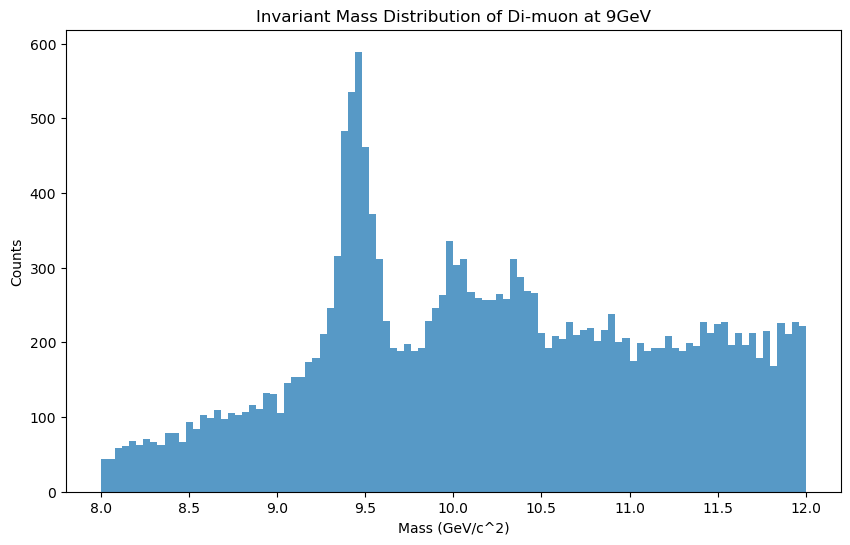

In [21]:
# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(mass, bins=100, alpha=0.75, label='Invariant Mass')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Invariant Mass Distribution of Di-muon at 9GeV')
plt.show()

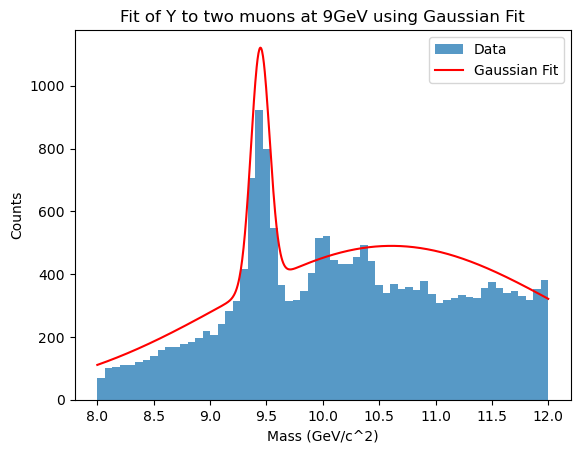

In [29]:
from scipy.optimize import curve_fit
# 定义高斯函数
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))

# 定义多重高斯函数
def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp = params[i]
        cen = params[i+1]
        wid = params[i+2]
        y += gaussian(x, amp, cen, wid)
    return y

# 选择适当的拟合范围
mask = (mass > 8) & (mass < 12)
fit_data = mass[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 进行多重高斯拟合
initial_guess = [800, 9.5, 0.2, 300, 10, 0.5]  # 初始猜测参数，可以根据实际数据调整
popt, pcov = curve_fit(multi_gaussian, bin_centers, n, p0=initial_guess, maxfev=10000)

# 获取拟合参数
fitted_params = popt

# 验证拟合效果
plt.hist(fit_data, bins=60, alpha=0.75, label='Data')
x_fit = np.linspace(8, 12, 1000)
y_fit = multi_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Gaussian Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of Y to two muons at 9GeV using Gaussian Fit')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

# 读取数据
file_path = 'https://opendata.cern.ch/record/545/files/Ymumu.csv'
data_muons = pd.read_csv(file_path)

# 计算不变质量
mass_squared = (data_muons.E1 + data_muons.E2)**2 - (
    (data_muons.px1 + data_muons.px2)**2 +
    (data_muons.py1 + data_muons.py2)**2 +
    (data_muons.pz1 + data_muons.pz2)**2
)
mass_squared_pos = mass_squared[mass_squared > 0]
mass = np.sqrt(mass_squared_pos)

# 选择适当的拟合范围
mask = (mass > 8) & (mass < 12)
fit_data = mass[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 准备数据
x_data = bin_centers
y_data = n

# 标准化数据
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_data_scaled = scaler_x.fit_transform(x_data.reshape(-1, 1))
y_data_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1))

In [2]:
# 定义神经网络模型
def create_model():
    model = Sequential()
    model.add(layers.Dense(128, input_dim=1, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model
    
# 创建并训练模型
model = create_model()
history = model.fit(x_data_scaled, y_data_scaled, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000


D:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9213
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9777 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8616 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7773 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6520 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8750 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8547 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7303 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8374 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5390 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6294 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4888 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5206 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4982 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7271 
Epoch 16/1000
2/2 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


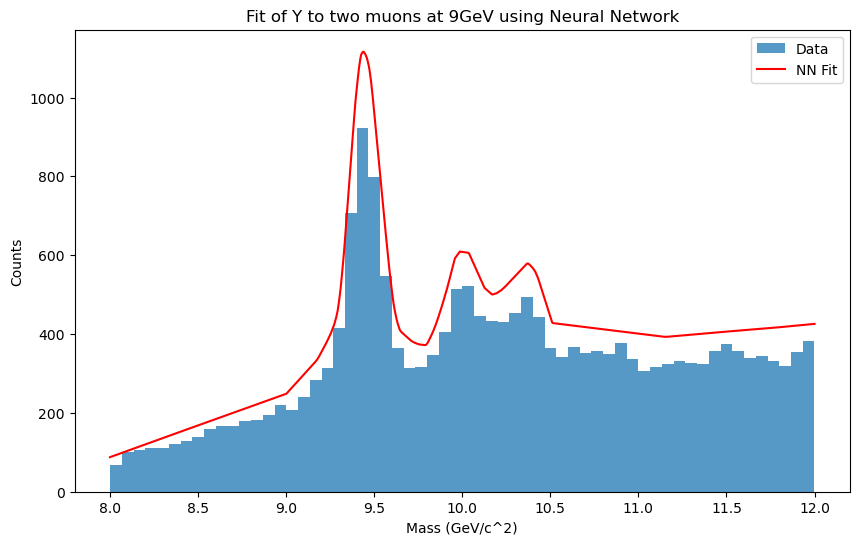

In [5]:
# 预测
x_fit = np.linspace(8, 12, 1000)
x_fit_scaled = scaler_x.transform(x_fit.reshape(-1, 1))
y_pred_scaled = model.predict(x_fit_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 绘图
plt.figure(figsize=(10, 6))
plt.hist(fit_data, bins=60, alpha=0.75, label='Data')
plt.plot(x_fit, y_pred, color='red', label='NN Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of Y to two muons at 9GeV using Neural Network')
plt.legend()
plt.show()

# 4.Try to fit the peaks at 9GeV for electrons

Find the data of Y to two electrons from 2010: https://opendata.cern.ch/record/305/files/dielectron-Upsilon.csv

In [44]:
file_path = 'https://opendata.cern.ch/record/305/files/dielectron-Upsilon.csv'

data_electrons = pd.read_csv(file_path)

data_electrons.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147390,543793293,15.41820,13.03870,8.10278,-1.43475,15.35130,-0.093326,0.556035,-1,7.55452,3.359180,0.707777,-6.72947,3.43293,-1.425720,0.207662,1,10.70400
1,147390,282663703,14.16600,3.09286,-1.91438,13.69110,3.63740,2.035820,-0.554250,-1,69.16330,12.418700,11.665400,67.03180,17.03830,2.078620,0.754130,-1,9.58692
2,147390,286624093,13.99450,8.65686,9.48207,-5.56734,12.83940,-0.421060,0.830861,1,3.79763,0.102288,-3.021800,-2.29788,3.02353,-0.701127,-1.536960,-1,11.67220
3,147390,289483709,6.40950,1.78811,3.10841,-5.31246,3.58602,-1.184420,1.048770,-1,27.64980,18.170800,-7.721890,-19.35740,19.74350,-0.867477,-0.401839,-1,11.48020
4,147390,133045648,4.79558,2.84168,-3.71841,1.04684,4.67993,0.221862,-0.918257,1,24.59900,10.834400,-2.438840,21.94940,11.10550,1.433050,-0.221411,1,10.50070


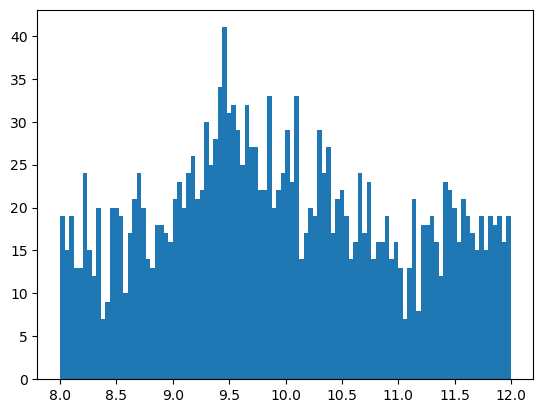

In [46]:
mass_electrons = data_electrons['M']
plt.hist(mass_electrons, bins=100)
plt.show()

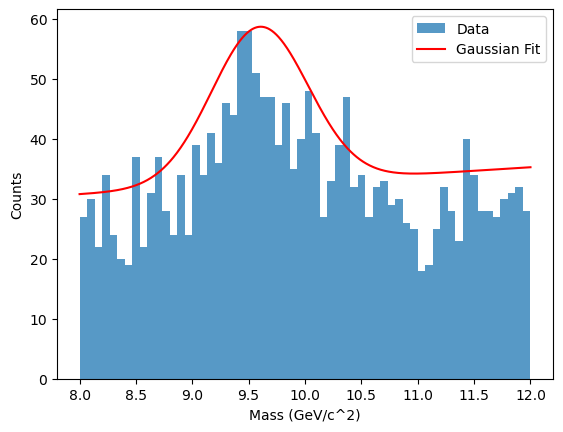

In [48]:
# 定义高斯函数
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))

# 定义多重高斯函数
def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp = params[i]
        cen = params[i+1]
        wid = params[i+2]
        y += gaussian(x, amp, cen, wid)
    return y

# 选择适当的拟合范围
mask = (mass_electrons > 8) & (mass_electrons < 12)
fit_data = mass_electrons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 进行多重高斯拟合
initial_guess = [30, 9.5, 0.3, 20, 10.5, 0.3]  # 初始猜测参数，可以根据实际数据调整
popt, pcov = curve_fit(multi_gaussian, bin_centers, n, p0=initial_guess, maxfev=10000)

# 获取拟合参数
fitted_params = popt

# 验证拟合效果
plt.hist(fit_data, bins=60, alpha=0.75, label='Data')
x_fit = np.linspace(8, 12, 1000)
y_fit = multi_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Gaussian Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.legend() 
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

# 读取数据
file_path = 'https://opendata.cern.ch/record/305/files/dielectron-Upsilon.csv'
data_electrons = pd.read_csv(file_path)

# 选择适当的拟合范围
mask = (mass > 8) & (mass < 12)
fit_data = mass[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 准备数据
x_data = bin_centers
y_data = n

# 标准化数据
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_data_scaled = scaler_x.fit_transform(x_data.reshape(-1, 1))
y_data_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1))

In [9]:
# 定义神经网络模型
def create_model():
    model = Sequential()
    model.add(layers.Dense(128, input_dim=1, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 创建并训练模型
model = create_model()
history = model.fit(x_data_scaled, y_data_scaled, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000


D:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0846
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9538 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0003 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8496 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8570 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7957 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6387 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7720 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6157 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8561 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5788 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8200 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5504 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8043 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6180 
Epoch 16/1000
2/2 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


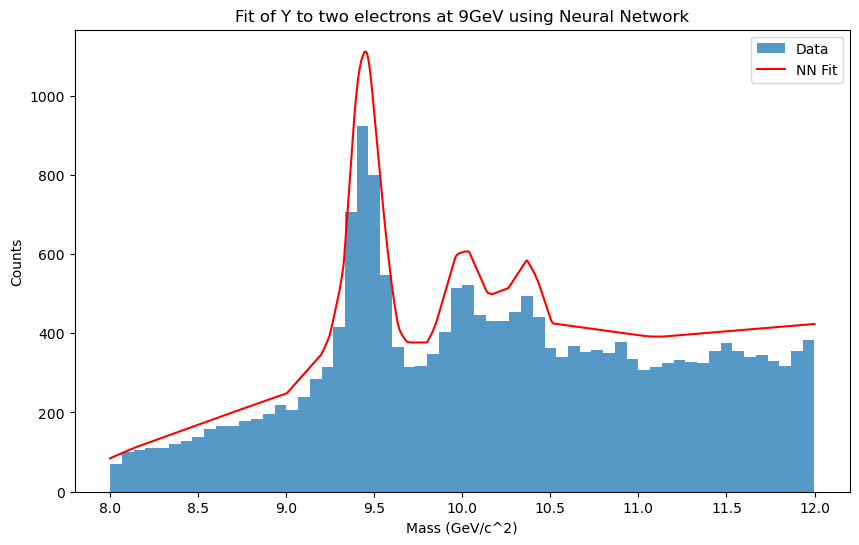

In [11]:
# 预测
x_fit = np.linspace(8, 12, 1000)
x_fit_scaled = scaler_x.transform(x_fit.reshape(-1, 1))
y_pred_scaled = model.predict(x_fit_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 绘图
plt.figure(figsize=(10, 6))
plt.hist(fit_data, bins=60, alpha=0.75, label='Data')
plt.plot(x_fit, y_pred, color='red', label='NN Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of Y to two electrons at 9GeV using Neural Network')
plt.legend()
plt.show()

# 5. Try to fit the peaks at 90GeV for di-muon

Note that Z to two muons from 2011 doesn't have the parameter M, so we choose the 2010. Find the data of Z to two muons from 2010: https://opendata.cern.ch/record/307/files/Zmumu.csv

In [52]:
file_path = 'https://opendata.cern.ch/record/307/files/Zmumu.csv'

data_muons = pd.read_csv(file_path)

data_muons.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GT,148031,10507008,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.217690,2.741260,1,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.05139,-0.440873,-1,82.462692
1,TT,148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,82.201866,-41.195288,17.433244,-68.964962,44.7322,-1.21769,2.741260,1,83.626204
2,GT,148031,10507008,62.344929,35.118050,-16.570362,-48.775247,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.21769,2.741260,1,83.308465
3,GG,148031,10507008,60.621875,34.144437,-16.119525,-47.426984,38.8311,-1.051390,-0.440873,-1,81.582778,-40.883323,17.299297,-68.447255,44.7322,-1.21769,2.741260,1,82.149373
4,GT,148031,105238546,41.826389,22.783582,15.036444,-31.689894,27.2981,-0.990688,0.583351,1,49.760726,-20.177373,-9.354149,44.513955,21.8913,1.44434,-2.707650,-1,90.469123


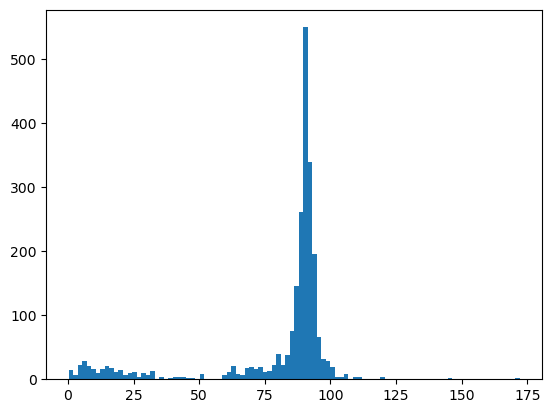

In [53]:
mass_muons = data_muons['M']
plt.hist(mass_muons, bins=100)
plt.show()

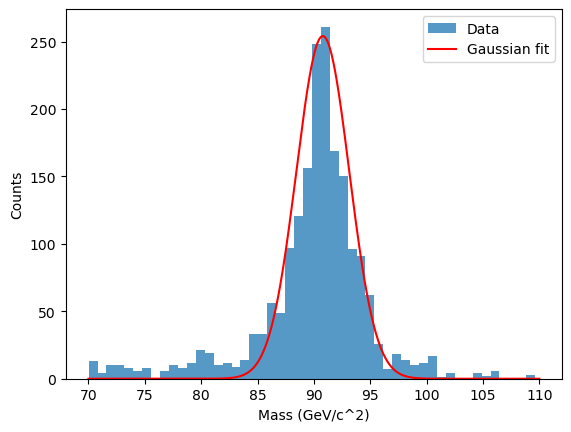

In [54]:
# 定义高斯函数
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))

# 选择适当的拟合范围
mask = (mass_muons > 70) & (mass_muons < 110)
fit_data = mass_muons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=43)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 进行高斯拟合
initial_guess = [500, 90, 5]  # 初始猜测参数
popt, pcov = curve_fit(gaussian, bin_centers, n, p0=initial_guess, maxfev=5000)

# 获取拟合参数
amplitude = popt[0]
center = popt[1]
width = popt[2]

# 验证拟合效果
plt.hist(fit_data, bins=50, alpha=0.75, label='Data')
x_fit = np.linspace(70, 110, 1000)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Gaussian fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.legend()
plt.show()

Fit the peak by using NN:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

# 读取数据
file_path = 'https://opendata.cern.ch/record/307/files/Zmumu.csv'
data_muons = pd.read_csv(file_path)

# 使用数据中的 M 列
mass_muons = data_muons['M']

# 选择适当的拟合范围
mask = (mass_muons > 80) & (mass_muons < 100)
fit_data = mass_muons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 准备数据
x_data = bin_centers
y_data = n

# 标准化数据
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_data_scaled = scaler_x.fit_transform(x_data.reshape(-1, 1))
y_data_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1))

In [19]:
# 定义神经网络模型
def create_model():
    model = Sequential()
    model.add(layers.Dense(256, input_dim=1, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 创建并训练模型
model = create_model()
history = model.fit(x_data_scaled, y_data_scaled, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000


D:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9314
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8854 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7557 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7402 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6526 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6585 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6177 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6270 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6115 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5375 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4527 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4774 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3687 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3869 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2986 
Epoch 16/1000
2/2 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


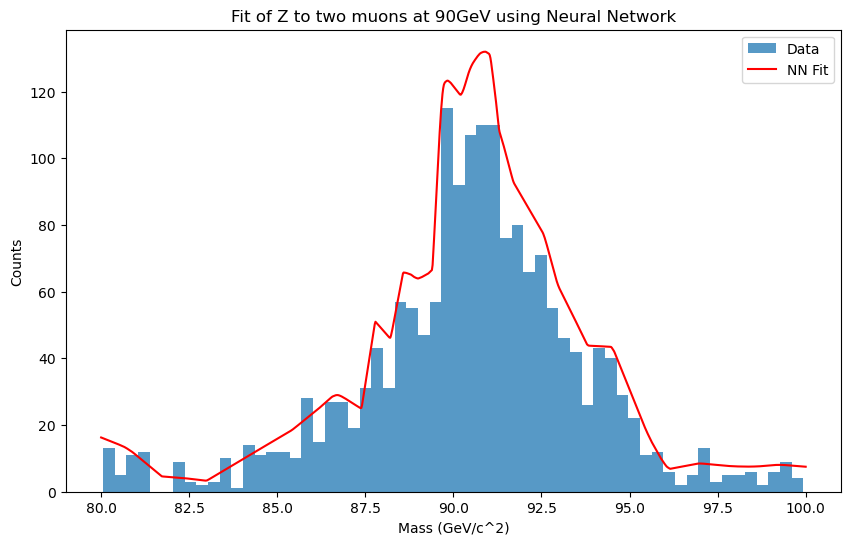

In [21]:
# 预测
x_fit = np.linspace(80, 100, 1000)
x_fit_scaled = scaler_x.transform(x_fit.reshape(-1, 1))
y_pred_scaled = model.predict(x_fit_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 绘图
plt.figure(figsize=(10, 6))
plt.hist(fit_data, bins=60, alpha=0.75, label='Data')
plt.plot(x_fit, y_pred, color='red', label='NN Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of Z to two muons at 90GeV using Neural Network')
plt.legend()
plt.show()

# 6.Try to fit the peaks at 90GeV for electrons

Find the data of Z to two electrons from 2010: https://opendata.cern.ch/record/306/files/Zee.csv

In [58]:
file_path = 'https://opendata.cern.ch/record/306/files/Zee.csv'

data_electrons = pd.read_csv(file_path)

data_electrons.head()

,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,GSF-GSF,140401,91126796,117.806835,-33.389291,25.484130,-110.064367,42.0034,-1.69103,2.489670,-1,192.264324,32.345164,-31.684472,-186.856776,45.2782,-2.125030,-0.775080,1,89.120279
1,GSF-GSF,141956,136109945,329.052725,47.184068,27.421155,-324.495670,54.5734,-2.48287,0.526446,-1,113.528858,-14.816667,-32.068562,-107.892888,35.3260,-1.835450,-2.003610,1,88.596531
2,GSF-GSF,141956,78468893,114.958043,19.551224,-34.756360,-107.819742,39.8780,-1.72035,-1.058390,1,185.363550,-26.149613,36.953383,-179.750636,45.2698,-2.087570,2.186630,-1,86.301632
3,GSF-GSF,141956,192779968,80.550526,17.205798,-20.324504,-76.021459,26.6294,-1.77150,-0.868306,1,35.315247,-25.614445,24.160334,-2.710181,35.2111,-0.076894,2.385400,-1,84.503178
4,GSF-GSF,141956,179110337,145.570564,-26.386310,25.952645,140.787116,37.0105,2.04604,2.364480,-1,375.168527,66.136097,-7.675483,369.213390,66.5800,2.414150,-0.115539,1,95.679595


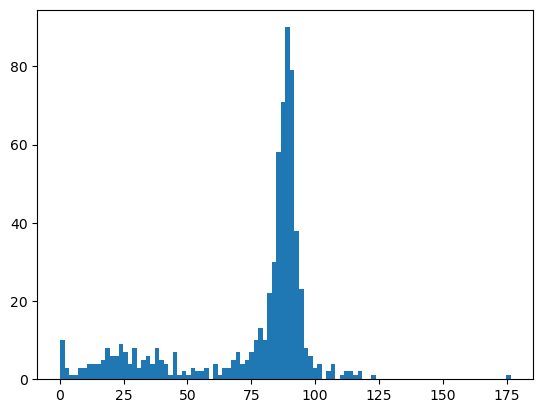

In [59]:
mass_electrons = data_electrons['M']
plt.hist(mass_electrons, bins=100)
plt.show()

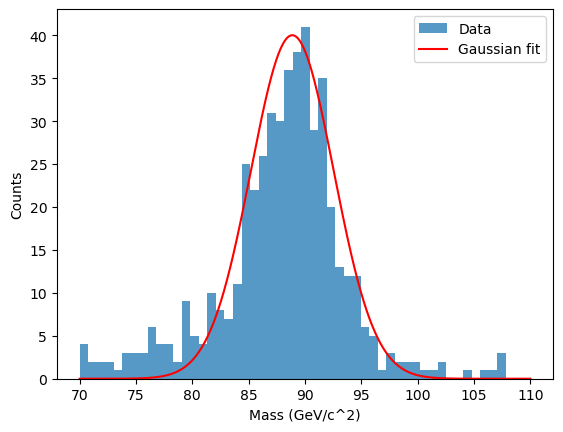

In [62]:
# 定义高斯函数
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))

# 选择适当的拟合范围
mask = (mass_electrons > 70) & (mass_electrons < 110)
fit_data = mass_electrons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=45)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 进行高斯拟合
initial_guess = [500, 90, 5]  # 初始猜测参数
popt, pcov = curve_fit(gaussian, bin_centers, n, p0=initial_guess, maxfev=5000)

# 获取拟合参数
amplitude = popt[0]
center = popt[1]
width = popt[2]

# 验证拟合效果
plt.hist(fit_data, bins=50, alpha=0.75, label='Data')
x_fit = np.linspace(70, 110, 10000)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Gaussian fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.legend()
plt.show()

Fit the peak by using NN:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

# 读取数据
file_path = 'https://opendata.cern.ch/record/306/files/Zee.csv'
data_electrons = pd.read_csv(file_path)

# 使用数据中的 M 列
mass_electrons = data_electrons['M']

# 选择适当的拟合范围
mask = (mass_electrons > 80) & (mass_electrons < 100)
fit_data = mass_electrons[mask]

# 计算直方图数据
n, bins = np.histogram(fit_data, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 准备数据
x_data = bin_centers
y_data = n

# 标准化数据
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_data_scaled = scaler_x.fit_transform(x_data.reshape(-1, 1))
y_data_scaled = scaler_y.fit_transform(y_data.reshape(-1, 1))


In [ ]:
# 定义神经网络模型
def create_model():
    model = Sequential()
    model.add(layers.Dense(256, input_dim=1, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 创建并训练模型
model = create_model()
history = model.fit(x_data_scaled, y_data_scaled, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000


D:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0088
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9382 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8989 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8270 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7228 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7639 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6618 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7168 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6087 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5456 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5019 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4039 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4036 
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3583 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3235 
Epoch 16/1000
2/2 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


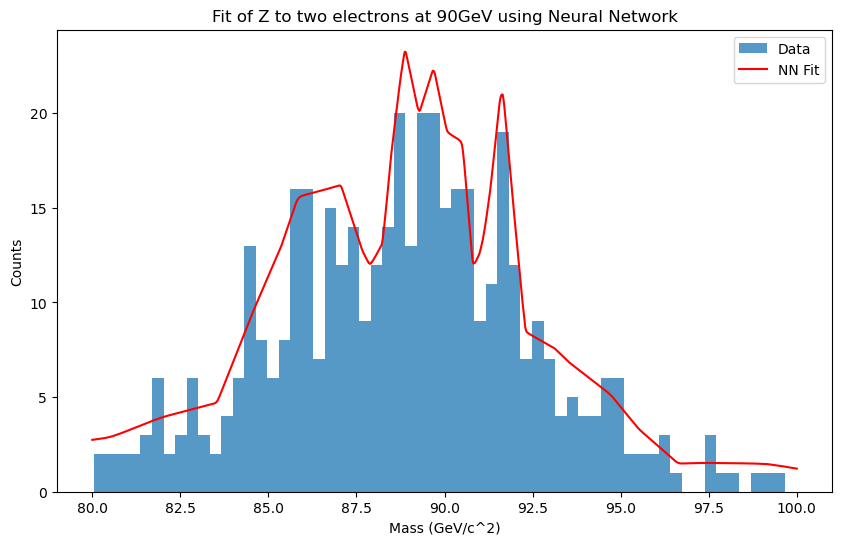

In [28]:
# 预测
x_fit = np.linspace(80, 100, 1000)
x_fit_scaled = scaler_x.transform(x_fit.reshape(-1, 1))
y_pred_scaled = model.predict(x_fit_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 绘图
plt.figure(figsize=(10, 6))
plt.hist(fit_data, bins=60, alpha=0.75, label='Data')
plt.plot(x_fit, y_pred, color='red', label='NN Fit')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Fit of Z to two electrons at 90GeV using Neural Network')
plt.legend()
plt.show()